In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import pandas as pd
import requests
import re
import os

API_KEY = "удалён"
SPREADSHEET_ID = '1bHocHpmdiEVOhd7qlCqPd30QHYh85S7OT4WdAZi6J08'
RANGE_NAME = 'A:Z'

url = f'https://sheets.googleapis.com/v4/spreadsheets/{SPREADSHEET_ID}/values/{RANGE_NAME}?key={API_KEY}'

# Выполняем GET-запрос
response = requests.get(url)

# Проверяем статус ответа
if response.status_code == 200:
    data = response.json()
    values = data.get('values', [])
    # Преобразуем в DataFrame
    df = pd.DataFrame(values[1:], columns=values[0])  # Первая строка - заголовки столбцов
else:
    print(f"Ошибка: {response.status_code}")

In [60]:
df

,Timestamp,Был ли у вас опыт обучения на онлайн IT-курсах?,Курс какой продолжительности вы считаете наиболее эффективным для получения навыков в новой IT-сфере?,Какая цена IT-курса в месяц для вас наиболее приемлема?,Сколько часов в неделю вы готовы уделять обучению на IT-курсе?
0,3/15/2025 19:12:03,Да,3 - 5 месяцев,2000,4
1,3/15/2025 19:12:06,Да,3 - 5 месяцев,1500,4
2,3/15/2025 19:16:30,Да,3 - 5 месяцев,5000,Часов 8-12
3,3/15/2025 19:17:34,Да,10 - 12 месяцев,5000,10
4,3/15/2025 19:18:40,Да,3 - 5 месяцев,7000,10
5,3/15/2025 19:19:43,Да,3 - 5 месяцев,2000,5
6,3/15/2025 19:21:24,Да,3 - 5 месяцев,199,5
7,3/15/2025 19:21:57,Нет,3 - 5 месяцев,2500,4-5
8,3/15/2025 19:22:32,Да,6 - 7 месяцев,15 000,25
9,3/15/2025 19:25:12,Да,6 - 7 месяцев,4000,2


In [61]:
# Функция для извлечения чисел и обработки диапазонов
def extract_and_process_numbers(text):
    if not isinstance(text, str):
        return None  # Обрабатываем случай, если передано не строковое значение
    
    # Приводим к единому формату чисел с пробелами и суффиксами
    text = re.sub(r'(\d)\s+(?=\d{3})', r'\1', text)  # Убираем пробелы внутри чисел
    text = re.sub(r'(\d+)\s*[ккКК]', lambda m: str(int(m.group(1)) * 1000), text)  # 15к -> 15000
    text = re.sub(r'(\d+)\s*(тыс|тысяч)', lambda m: str(int(m.group(1)) * 1000), text)  # 10 тыс -> 10000
    
    # Находим диапазоны и одиночные числа
    matches = re.findall(r'(\d+(?:\.\d+)?)[-–](\d+(?:\.\d+)?)|(\d+(?:\.\d+)?)', text)
    
    numbers = []
    for match in matches:
        if len(match) >= 2 and match[0] and match[1]:  # Это диапазон
            num1, num2 = float(match[0].replace('.', '')), float(match[1].replace('.', ''))
            numbers.append((num1 + num2) / 2)  # Среднее арифметическое
        elif len(match) >= 3 and match[2]:  # Это одиночное число
            numbers.append(float(match[2].replace('.', '')))
    
    return numbers if len(numbers) > 1 else (numbers[0] if numbers else None)


# Применяем функцию к столбцу
df['Цена'] = df['Какая цена IT-курса в месяц для вас наиболее приемлема?'].apply(extract_and_process_numbers)
df['Уделённое время ч/нед'] = df['Сколько часов в неделю вы готовы уделять обучению на IT-курсе?'].apply(extract_and_process_numbers)

# Удаляем строки, где не было чисел
df = df.dropna()

In [62]:
df

,Timestamp,Был ли у вас опыт обучения на онлайн IT-курсах?,Курс какой продолжительности вы считаете наиболее эффективным для получения навыков в новой IT-сфере?,Какая цена IT-курса в месяц для вас наиболее приемлема?,Сколько часов в неделю вы готовы уделять обучению на IT-курсе?,Цена,Уделённое время ч/нед
0,3/15/2025 19:12:03,Да,3 - 5 месяцев,2000,4,2000.0,4.0
1,3/15/2025 19:12:06,Да,3 - 5 месяцев,1500,4,1500.0,4.0
2,3/15/2025 19:16:30,Да,3 - 5 месяцев,5000,Часов 8-12,5000.0,10.0
3,3/15/2025 19:17:34,Да,10 - 12 месяцев,5000,10,5000.0,10.0
4,3/15/2025 19:18:40,Да,3 - 5 месяцев,7000,10,7000.0,10.0
5,3/15/2025 19:19:43,Да,3 - 5 месяцев,2000,5,2000.0,5.0
6,3/15/2025 19:21:24,Да,3 - 5 месяцев,199,5,199.0,5.0
7,3/15/2025 19:21:57,Нет,3 - 5 месяцев,2500,4-5,2500.0,4.5
8,3/15/2025 19:22:32,Да,6 - 7 месяцев,15 000,25,15000.0,25.0
9,3/15/2025 19:25:12,Да,6 - 7 месяцев,4000,2,4000.0,2.0


In [63]:
# Удаляем выбросы по "Цена" с использованием метода межквартильного размаха (IQR)
Q1 = df['Цена'].quantile(0.25)
Q3 = df['Цена'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Цена'] >= lower_bound) & (df['Цена'] <= upper_bound) & (df['Цена'] != 0)]

In [64]:
df

,Timestamp,Был ли у вас опыт обучения на онлайн IT-курсах?,Курс какой продолжительности вы считаете наиболее эффективным для получения навыков в новой IT-сфере?,Какая цена IT-курса в месяц для вас наиболее приемлема?,Сколько часов в неделю вы готовы уделять обучению на IT-курсе?,Цена,Уделённое время ч/нед
0,3/15/2025 19:12:03,Да,3 - 5 месяцев,2000,4,2000.0,4.0
1,3/15/2025 19:12:06,Да,3 - 5 месяцев,1500,4,1500.0,4.0
2,3/15/2025 19:16:30,Да,3 - 5 месяцев,5000,Часов 8-12,5000.0,10.0
3,3/15/2025 19:17:34,Да,10 - 12 месяцев,5000,10,5000.0,10.0
4,3/15/2025 19:18:40,Да,3 - 5 месяцев,7000,10,7000.0,10.0
5,3/15/2025 19:19:43,Да,3 - 5 месяцев,2000,5,2000.0,5.0
6,3/15/2025 19:21:24,Да,3 - 5 месяцев,199,5,199.0,5.0
7,3/15/2025 19:21:57,Нет,3 - 5 месяцев,2500,4-5,2500.0,4.5
8,3/15/2025 19:22:32,Да,6 - 7 месяцев,15 000,25,15000.0,25.0
9,3/15/2025 19:25:12,Да,6 - 7 месяцев,4000,2,4000.0,2.0


In [65]:
# Создаем интерактивный график для распределения цен
fig = px.histogram(df, x='Цена', nbins=30, title='Распределение цен', marginal='box', opacity=0.7)
fig.update_layout(xaxis_title='Цена', yaxis_title='Частота')

fig.show()

In [66]:
# Виолончельный график (Violin plot)
fig_violin = px.violin(df, y='Цена', box=True, points='all', title='Violin Plot цен')
fig_violin.show()

# Boxplot отдельно
fig_box = px.box(df, y='Цена', title='Boxplot цен')
fig_box.show()

In [67]:
# Создаем интерактивный график для распределения часов на изучение курса
fig = px.histogram(df, x='Уделённое время ч/нед', nbins=30, title='Готовность уделять время курсу', marginal='box', opacity=0.7)
fig.update_layout(xaxis_title='Уделённое время ч/нед', yaxis_title='Частота')

fig.show()

In [68]:
# Виолончельный график для времени
fig_violin = px.violin(df, y='Уделённое время ч/нед', box=True, points='all', title='Violin Plot часов')
fig_violin.show()

# Boxplot отдельно для времени
fig_box = px.box(df, y='Уделённое время ч/нед', title='Готовность уделять время курсу')
fig_box.show()

In [69]:
counts = df['Был ли у вас опыт обучения на онлайн IT-курсах?'].value_counts().reset_index()
counts.columns = ['Опыт_обучения', 'Количество']

# Построение круговой диаграммы
fig = px.pie(counts, values='Количество', names='Опыт_обучения', title='Был ли у вас опыт обучения на онлайн IT-курсах?')
fig.show()

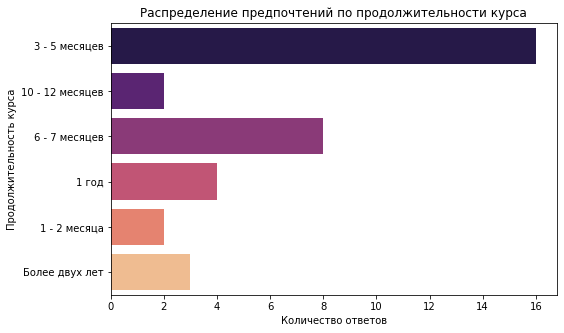

In [70]:
# Построение горизонтальной столбчатой диаграммы для продолжительности курса
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y='Курс какой продолжительности вы считаете наиболее эффективным для получения навыков в новой IT-сфере?', palette='magma')
plt.title('Распределение предпочтений по продолжительности курса')
plt.xlabel('Количество ответов')
plt.ylabel('Продолжительность курса')
plt.show()